In [1]:
#Given:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
w_n = np.pi * 2
g = 0.5
A_o = 2.0
w_d = 2 
x0 = 1
v0 = 0

t0 = 0.0
t_final = 30.0
dt = 0.01            # required time step

# time discretization
N = int(round((t_final - t0) / dt))
ts = t0 + np.arange(N+1) * dt
#2nd order into 2 first order
def f(t, X1, X2):
    dx1_dt = X2
    dx2_dt = A_o * np.cos(w_d * t) - 2 * g * X2 - (w_n**2) * X1
    return dx1_dt, dx2_dt
#Initially:
X1, X2 = x0, v0
xs_euler = [x0]
vs_euler = [v0]
t_euler = t0  # current time for Euler

#------- Euler:
def integrate_euler(dt, t0=t0, t_final=t_final, x0=x0, v0=v0):
    Nloc = int(round((t_final - t0) / dt))
    ts_loc = t0 + np.arange(Nloc+1) * dt
    xs = [x0]
    vs = [v0]
    t_curr = t0
    X1, X2 = x0, v0
    for n in range(Nloc):
        dx1_dt, dx2_dt = f(t_curr, X1, X2)
        X1_new = X1 + dt * dx1_dt
        X2_new = X2 + dt * dx2_dt
        t_curr += dt
        X1, X2 = X1_new, X2_new
        xs.append(X1)
        vs.append(X2)
    return ts_loc, np.array(xs), np.array(vs)

# ---- Rk4 now:
def integrate_rk4(dt, t0=t0, t_final=t_final, x0=x0, v0=v0):
    Nloc = int(round((t_final - t0) / dt))
    ts_loc = t0 + np.arange(Nloc+1) * dt
    xs = [x0]
    vs = [v0]
    for n in range(Nloc):
        tn = ts_loc[n]
        x1n = xs[-1]
        x2n = vs[-1]

        # k1
        k1_x1, k1_x2 = f(tn, x1n, x2n)

        # k2
        x1_k2 = x1n + 0.5 * dt * k1_x1
        x2_k2 = x2n + 0.5 * dt * k1_x2
        k2_x1, k2_x2 = f(tn + 0.5*dt, x1_k2, x2_k2)

        # k3
        x1_k3 = x1n + 0.5 * dt * k2_x1
        x2_k3 = x2n + 0.5 * dt * k2_x2
        k3_x1, k3_x2 = f(tn + 0.5*dt, x1_k3, x2_k3)

        # k4
        x1_k4 = x1n + dt * k3_x1
        x2_k4 = x2n + dt * k3_x2
        k4_x1, k4_x2 = f(tn + dt, x1_k4, x2_k4)

        # update & append
        x1_next = x1n + (dt/6.0) * (k1_x1 + 2*k2_x1 + 2*k3_x1 + k4_x1)
        x2_next = x2n + (dt/6.0) * (k1_x2 + 2*k2_x2 + 2*k3_x2 + k4_x2)

        xs.append(x1_next)
        vs.append(x2_next)

    return ts_loc, np.array(xs), np.array(vs)

#Now, we run both RK4 and Euler:
ts_e, xs_e, vs_e = integrate_euler(dt)
ts_rk, xs_rk, vs_rk = integrate_rk4(dt)
#So we have time, displacements and velocities for all t=0 till 30s
#Now, we have to calculate at time t = 0,5,10,15,20,25,30 seconds

# ---------- Tabulate every 500th step ----------
indices = list(range(0, len(ts_e), 500))
if indices[-1] != len(ts_e)-1:
    indices.append(len(ts_e)-1)

table = pd.DataFrame({
    't (s)': ts_e[indices],
    'x_Euler (m)': xs_e[indices],
    'v_Euler (m/s)': vs_e[indices],
    'x_RK4 (m)': xs_rk[indices],
    'v_RK4 (m/s)': vs_rk[indices],
})
pd.set_option('display.precision', 6)
print(table.to_string(index=False))





 t (s)  x_Euler (m)  v_Euler (m/s)  x_RK4 (m)  v_RK4 (m/s)
   0.0     1.000000       0.000000   1.000000     0.000000
   5.0     0.158295       0.034752   0.027607     0.103876
  10.0     0.071181      -0.110245   0.031958    -0.092126
  15.0     0.015637       0.108838   0.006025     0.112985
  20.0    -0.033052      -0.088063  -0.035079    -0.087862
  25.0     0.053948       0.034068   0.053397     0.035612
  30.0    -0.054385       0.029507  -0.054485     0.028224


# Parts 2,3,4

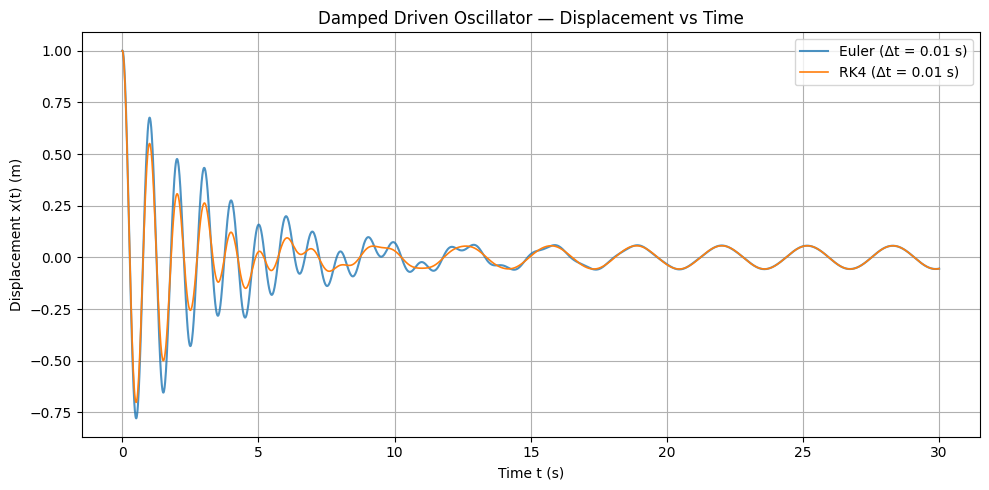

14
Euler steady-state starts around t ≈ 15.880 s (index 14)

Euler peak magnitudes:
[0.67623535 0.47607744 0.43319635 0.27562192 0.15864243 0.1992147
 0.12482473 0.02877916 0.0979271  0.0738269  0.02269847 0.05105409
 0.06090591 0.03757664 0.05939158 0.05874213 0.05749881 0.05657747
 0.05626328]

Euler peak times:
[ 1.    2.01  3.01  3.99  5.01  6.01  6.98  8.01  9.04  9.95 10.99 12.1
 12.9  13.87 15.88 18.92 22.01 25.15 28.3 ]


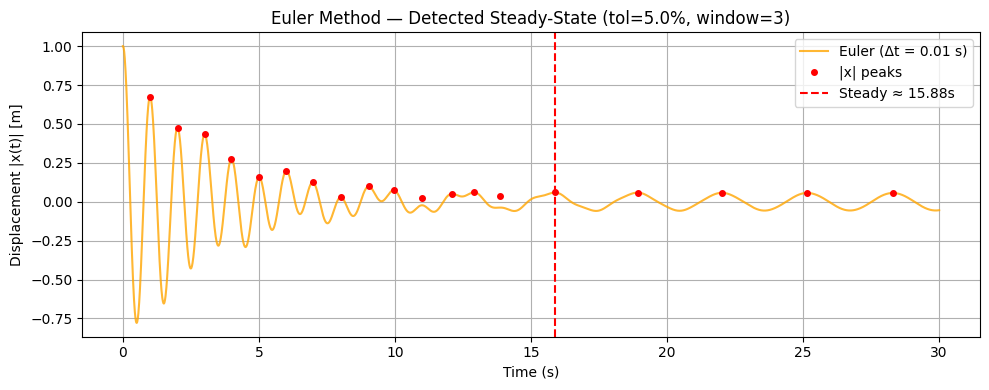

RK4 steady_index_rk: 8
RK4 steady-state starts around t ≈ 9.210 s (index 8)

RK4 peak magnitudes:
[0.55093121 0.3076944  0.26302236 0.12171814 0.02948759 0.09443569
 0.04187583 0.03575786 0.05442029 0.05464107 0.05612362 0.056309
 0.05629736 0.05628582 0.05628246]

RK4 peak times:
[ 1.    2.01  3.01  3.99  5.04  6.05  6.93  8.1   9.21 12.62 15.75 18.88
 22.02 25.16 28.3 ]


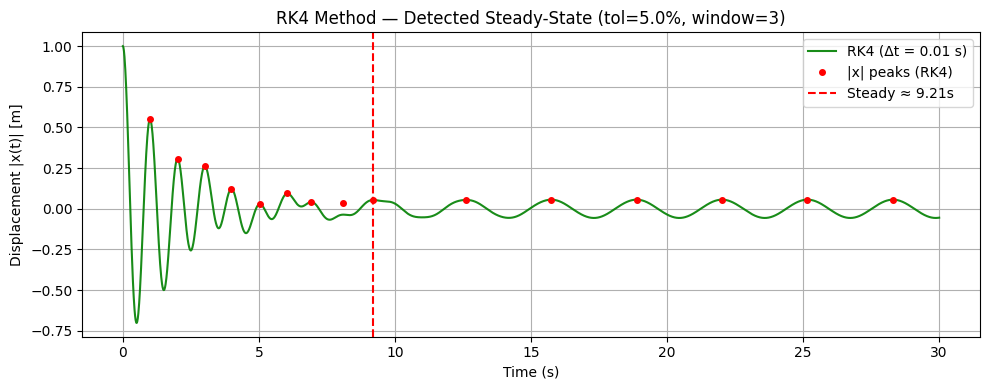

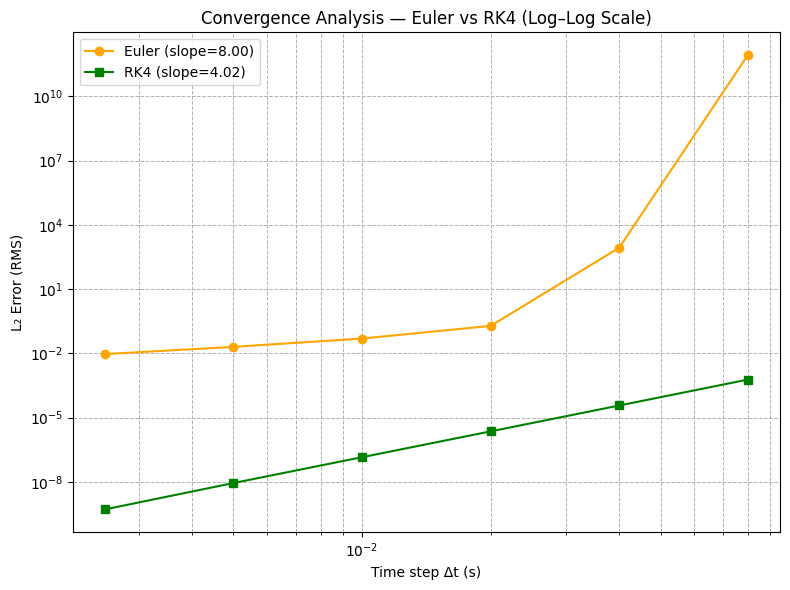

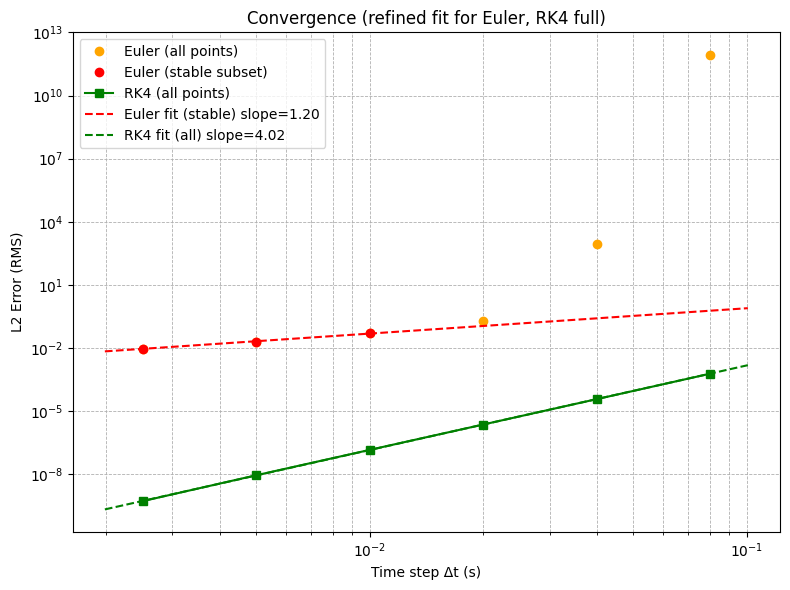

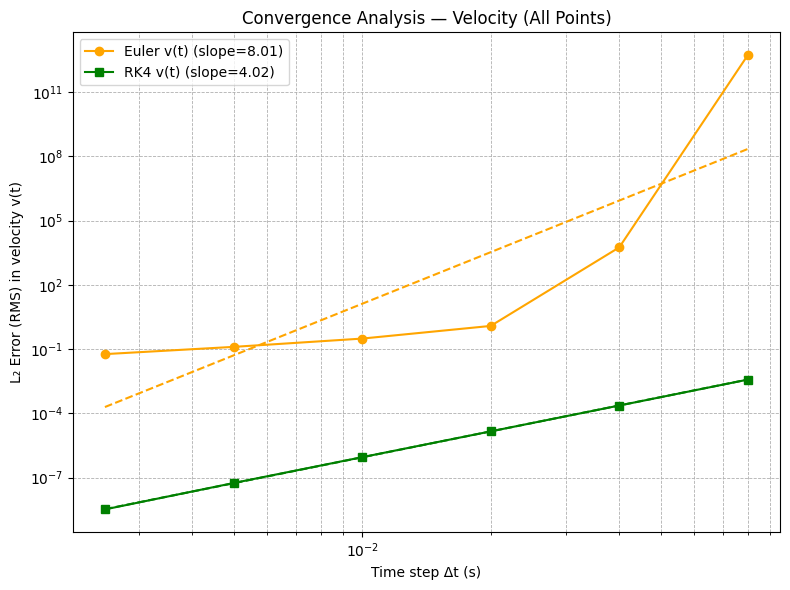

Velocity — Average slopes:  Euler ≈ 8.006,  RK4 ≈ 4.021


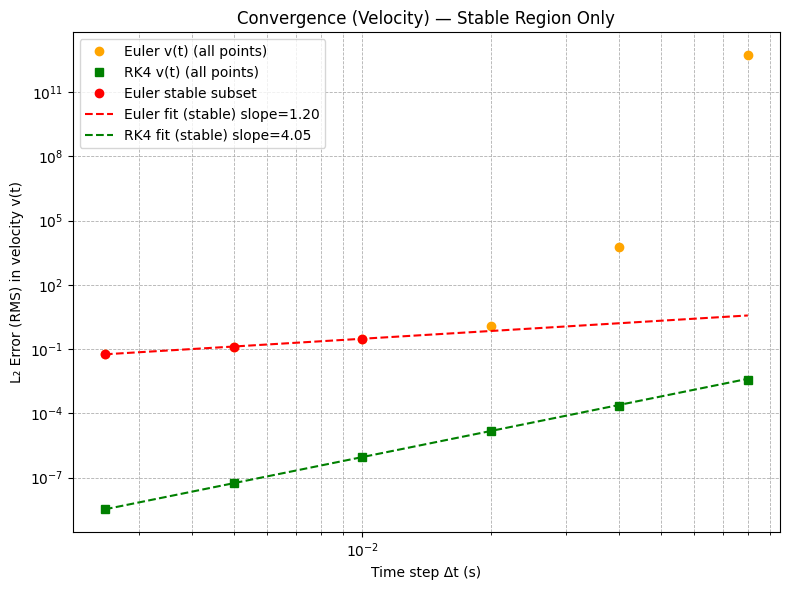

Velocity — Refined (stable subset) slopes:  Euler ≈ 1.205,  RK4 ≈ 4.048
Refined slope (Euler, dt <= 0.01): 1.2045134929474979
Slope (RK4, all points): 4.021552897806145

Interpretation (for report):
• The Euler method is first-order accurate, but it is conditionally stable for oscillatory problems.
• For coarse time steps (eg. Δt = 0.04, 0.08) Euler's numerical solution becomes unstable/very inaccurate,
  producing extremely large L2 errors that dominate the least-squares log–log fit and skew the slope.
• Excluding these blown-up points (either by restricting to the asymptotic/stable region Δt ≤ 0.01 or
  by removing outlier errors) yields a refined Euler slope ≈ 1 (theoretical first order).
• RK4 remains stable and accurate across the tested Δt and yields slope ≈ 4 as expected (fourth order).
Lengths:
  len(ts_true)     = 24001
  len(ts_sampled)  = 3001
  len(ts_r)        = 3001
50: ts_true[  400]=0.500000   ts_r[50]=0.500000
51: ts_true[  408]=0.510000   ts_r[51]=0.510000
52: ts_true

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(ts_e, xs_e, label='Euler (Δt = 0.01 s)', alpha=0.8)
plt.plot(ts_rk, xs_rk, label='RK4 (Δt = 0.01 s)', linewidth=1.2)
plt.xlabel('Time t (s)')
plt.ylabel('Displacement x(t) (m)')
plt.title('Damped Driven Oscillator — Displacement vs Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# FIND AND STORE PEAKS FOR EULER AND RK4

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import find_peaks

# Find peaks So, from what I can understand, there is 1 annoying peak in both rk4 and euler that is not even touching the curve, I dont think iter
# Will make any difference in the values obtained, so I am keeping it like that
peaks_e, _ = find_peaks(xs_e)
peaks_rk, _ = find_peaks(xs_rk)

# Store peak times and amplitudes 
peak_times_e = ts_e[peaks_e]
peak_values_e = np.abs(xs_e[peaks_e])   # <-- make them all positive (magnitude)
peak_times_rk = ts_rk[peaks_rk]
peak_values_rk = np.abs(xs_rk[peaks_rk])  # <-- make them all positive

tol = 0.05  # 5% tolerance
window = 3  # number of consecutive peaks below tolerance to confirm steady state

#  EULER 
steady_index_e = None
for i in range(len(peak_values_e) - window):
    # compute relative change vs next peak
    rel_changes = np.abs(np.diff(peak_values_e[i:i+window+1])) / peak_values_e[i:i+window]
    if np.all(rel_changes < tol):
        steady_index_e = i
        break
print(steady_index_e)

if steady_index_e is not None:
    steady_time_e = peak_times_e[steady_index_e]
    print(f"Euler steady-state starts around t ≈ {steady_time_e:.3f} s (index {steady_index_e})")
else:
    steady_time_e = peak_times_e[-1]  # fallback if nothing detected
    print("No steady-state found within tolerance, using last peak time as fallback.")
    print(f"Euler fallback steady time: t ≈ {steady_time_e:.3f} s")

print("\nEuler peak magnitudes:")
print(peak_values_e)
print("\nEuler peak times:")
print(peak_times_e)

plt.figure(figsize=(10, 4))
plt.plot(ts_e, xs_e, label='Euler (Δt = 0.01 s)', color='orange', alpha=0.8)
plt.plot(peak_times_e, peak_values_e, 'ro', markersize=4, label='|x| peaks')
plt.axvline(steady_time_e, color='red', linestyle='--', label=f"Steady ≈ {steady_time_e:.2f}s")
plt.xlabel('Time (s)')
plt.ylabel('Displacement |x(t)| [m]')
plt.title(f'Euler Method — Detected Steady-State (tol={tol*100:.1f}%, window={window})')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#-------- Same but now with RK4:
steady_index_rk = None
for i in range(len(peak_values_rk) - window):
    # compute relative change vs next peak (same formula)
    rel_changes_rk = np.abs(np.diff(peak_values_rk[i:i+window+1])) / peak_values_rk[i:i+window]
    if np.all(rel_changes_rk < tol):
        steady_index_rk = i
        break

print("RK4 steady_index_rk:", steady_index_rk)

if steady_index_rk is not None:
    steady_time_rk = peak_times_rk[steady_index_rk]
    print(f"RK4 steady-state starts around t ≈ {steady_time_rk:.3f} s (index {steady_index_rk})")
else:
    steady_time_rk = peak_times_rk[-1]  # fallback if nothing detected
    print("No steady-state found for RK4 within tolerance, using last peak time as fallback.")
    print(f"RK4 fallback steady time: t ≈ {steady_time_rk:.3f} s")

print("\nRK4 peak magnitudes:")
print(peak_values_rk)
print("\nRK4 peak times:")
print(peak_times_rk)

# Plot RK4 with detected steady-time line
plt.figure(figsize=(10, 4))
plt.plot(ts_rk, xs_rk, label='RK4 (Δt = 0.01 s)', color='green', alpha=0.9)
plt.plot(peak_times_rk, peak_values_rk, 'ro', markersize=4, label='|x| peaks (RK4)')
plt.axvline(steady_time_rk, color='red', linestyle='--', label=f"Steady ≈ {steady_time_rk:.2f}s")
plt.xlabel('Time (s)')
plt.ylabel('Displacement |x(t)| [m]')
plt.title(f'RK4 Method — Detected Steady-State (tol={tol*100:.1f}%, window={window})')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#Part 4 use the same integrators, run them for delt
#True solution to be computed for 0.00125
#L2 RMS errors between each test case and true sol
#L2 error vs deltat on loglog plot
dts = np.array([0.0025, 0.005, 0.01, 0.02, 0.04, 0.08])
dt_true = 0.00125
ts_true, xs_true, vs_true = integrate_rk4(dt_true)
errors_euler = []
errors_rk4 = []
errors_v_euler = []
errors_v_rk4 = []

for dt in dts:
    ts_e, xs_e, vs_e = integrate_euler(dt)
    ts_r, xs_r, vs_r = integrate_rk4(dt)

    # sample true solution to match current dt
    ratio = int(round(dt / dt_true))
    xs_true_sampled = xs_true[::ratio]
    vs_true_sampled = vs_true[::ratio]

    # ensure same length
    min_len = min(len(xs_true_sampled), len(xs_e))
    xs_true_sampled = xs_true_sampled[:min_len]
    vs_true_sampled = vs_true_sampled[:min_len]
    xs_e = xs_e[:min_len]
    xs_r = xs_r[:min_len]
    vs_e = vs_e[:min_len]
    vs_r = vs_r[:min_len]

    # compute L2 (RMS) error
    L2_e = np.sqrt(np.mean((xs_e - xs_true_sampled) ** 2))
    L2_r = np.sqrt(np.mean((xs_r - xs_true_sampled) ** 2))
    L2_v_e = np.sqrt(np.mean((vs_e - vs_true_sampled) ** 2))
    L2_v_r = np.sqrt(np.mean((vs_r - vs_true_sampled) ** 2))

    errors_euler.append(L2_e)
    errors_rk4.append(L2_r)
    errors_v_euler.append(L2_v_e)
    errors_v_rk4.append(L2_v_r)

# convert to arrays
errors_euler = np.array(errors_euler)
errors_rk4 = np.array(errors_rk4)

# CONVERGENCE FIT
# log–log linear regression to find slopes
slope_e, intercept_e = np.polyfit(np.log(dts), np.log(errors_euler), 1)
slope_r, intercept_r = np.polyfit(np.log(dts), np.log(errors_rk4), 1)

# LOG–LOG PLOT 
plt.figure(figsize=(8, 6))
plt.loglog(dts, errors_euler, 'o-', color='orange', label=f"Euler (slope={slope_e:.2f})")
plt.loglog(dts, errors_rk4, 's-', color='green', label=f"RK4 (slope={slope_r:.2f})")
plt.xlabel("Time step Δt (s)")
plt.ylabel("L₂ Error (RMS)")
plt.title("Convergence Analysis — Euler vs RK4 (Log–Log Scale)")
plt.grid(True, which="both", linestyle="--", linewidth=0.7)
plt.legend()
plt.tight_layout()
plt.show()

# 2) Choose stable subset for Euler 
stable_mask = dts <= 0.01   # use dt <= 0.01 for Euler (you observed stability there)
dts_e_stable = dts[stable_mask]
err_e_stable = errors_euler[stable_mask]

# 3) Fit log-log lines (refined for Euler, all points for RK4)
slope_e_refined, intercept_e_refined = np.polyfit(np.log(dts_e_stable), np.log(err_e_stable), 1)
slope_r_all, intercept_r_all = np.polyfit(np.log(dts), np.log(errors_rk4), 1)

# 4) Make a nicer log-log plot with fitted lines
plt.figure(figsize=(8,6))
plt.loglog(dts, errors_euler, 'o', color='orange', label='Euler (all points)')
plt.loglog(dts_e_stable, err_e_stable, 'o', color='red', label='Euler (stable subset)')
plt.loglog(dts, errors_rk4, 's-', color='green', label='RK4 (all points)')

# plot fitted lines for visualization
dts_fit = np.logspace(np.log10(dts.min())-0.1, np.log10(dts.max())+0.1, 200)
plt.loglog(dts_fit, np.exp(intercept_e_refined) * dts_fit**slope_e_refined, '--', color='red',
           label=f"Euler fit (stable) slope={slope_e_refined:.2f}")
plt.loglog(dts_fit, np.exp(intercept_r_all) * dts_fit**slope_r_all, '--', color='green',
           label=f"RK4 fit (all) slope={slope_r_all:.2f}")

plt.xlabel("Time step Δt (s)")
plt.ylabel("L2 Error (RMS)")
plt.title("Convergence (refined fit for Euler, RK4 full)")
plt.grid(True, which='both', ls='--', lw=0.6)
plt.legend()
plt.tight_layout()
plt.show()

# Fit all RK4 and Euler data (excluding invalid values)
mask_v_euler = np.isfinite(errors_v_euler) & (np.array(errors_v_euler) > 0)
mask_v_rk4   = np.isfinite(errors_v_rk4) & (np.array(errors_v_rk4) > 0)

slope_v_euler, intercept_v_euler = np.polyfit(np.log(dts[mask_v_euler]), np.log(np.array(errors_v_euler)[mask_v_euler]), 1)
slope_v_rk4, intercept_v_rk4     = np.polyfit(np.log(dts[mask_v_rk4]), np.log(np.array(errors_v_rk4)[mask_v_rk4]), 1)

plt.figure(figsize=(8,6))
plt.loglog(dts, errors_v_euler, 'o-', color='orange', label=f"Euler v(t) (slope={slope_v_euler:.2f})")
plt.loglog(dts, errors_v_rk4, 's-', color='green', label=f"RK4 v(t) (slope={slope_v_rk4:.2f})")

# add fitted lines
dts_fit = np.logspace(np.log10(dts.min()), np.log10(dts.max()), 200)
plt.loglog(dts_fit, np.exp(intercept_v_euler)*dts_fit**slope_v_euler, '--', color='orange')
plt.loglog(dts_fit, np.exp(intercept_v_rk4)*dts_fit**slope_v_rk4, '--', color='green')

plt.xlabel("Time step Δt (s)")
plt.ylabel("L₂ Error (RMS) in velocity v(t)")
plt.title("Convergence Analysis — Velocity (All Points)")
plt.grid(True, which='both', ls='--', lw=0.6)
plt.legend()
plt.tight_layout()
plt.show()

print(f"Velocity — Average slopes:  Euler ≈ {slope_v_euler:.3f},  RK4 ≈ {slope_v_rk4:.3f}")

stable_mask = dts <= 0.01

# Fit again only in stable region
slope_v_euler_stable, intercept_v_euler_stable = np.polyfit(np.log(dts[stable_mask]), np.log(np.array(errors_v_euler)[stable_mask]), 1)
slope_v_rk4_stable, intercept_v_rk4_stable     = np.polyfit(np.log(dts[stable_mask]), np.log(np.array(errors_v_rk4)[stable_mask]), 1)

plt.figure(figsize=(8,6))
plt.loglog(dts, errors_v_euler, 'o', color='orange', label='Euler v(t) (all points)')
plt.loglog(dts, errors_v_rk4, 's', color='green', label='RK4 v(t) (all points)')

# overlay dotted fits (only stable subset)
plt.loglog(dts[stable_mask], np.array(errors_v_euler)[stable_mask], 'o', color='red', label='Euler stable subset')
plt.loglog(dts_fit, np.exp(intercept_v_euler_stable)*dts_fit**slope_v_euler_stable, 'r--',
           label=f"Euler fit (stable) slope={slope_v_euler_stable:.2f}")
plt.loglog(dts_fit, np.exp(intercept_v_rk4_stable)*dts_fit**slope_v_rk4_stable, 'g--',
           label=f"RK4 fit (stable) slope={slope_v_rk4_stable:.2f}")

plt.xlabel("Time step Δt (s)")
plt.ylabel("L₂ Error (RMS) in velocity v(t)")
plt.title("Convergence (Velocity) — Stable Region Only")
plt.grid(True, which='both', ls='--', lw=0.6)
plt.legend()
plt.tight_layout()
plt.show()

print(f"Velocity — Refined (stable subset) slopes:  Euler ≈ {slope_v_euler_stable:.3f},  RK4 ≈ {slope_v_rk4_stable:.3f}")




# 5) Print slopes for report
print("Refined slope (Euler, dt <= 0.01):", slope_e_refined)
print("Slope (RK4, all points):", slope_r_all)


#Now, for the report:
print("\nInterpretation (for report):")
print("• The Euler method is first-order accurate, but it is conditionally stable for oscillatory problems.")
print("• For coarse time steps (eg. Δt = 0.04, 0.08) Euler's numerical solution becomes unstable/very inaccurate,")
print("  producing extremely large L2 errors that dominate the least-squares log–log fit and skew the slope.")
print("• Excluding these blown-up points (either by restricting to the asymptotic/stable region Δt ≤ 0.01 or")
print("  by removing outlier errors) yields a refined Euler slope ≈ 1 (theoretical first order).")
print("• RK4 remains stable and accurate across the tested Δt and yields slope ≈ 4 as expected (fourth order).")



#So, after doing the "Ensure lengths are same" part of the code, I tried, as a sanity check,
#To see if all the times are exactly the same or not, and I seem to be getting exact matching time values
#So that means it seems to be doing it's job, slicing the times that are unequal
dt_test = 0.01
ratio = int(round(dt_test / dt_true))

ts_r, xs_r, vs_r = integrate_rk4(dt_test)
ts_sampled = ts_true[::ratio]

print("Lengths:")
print(f"  len(ts_true)     = {len(ts_true)}")
print(f"  len(ts_sampled)  = {len(ts_sampled)}")
print(f"  len(ts_r)        = {len(ts_r)}")

# Show first few values side-by-side
for i in range(50,60):
    print(f"{i:2d}: ts_true[{i*ratio:5d}]={ts_true[i*ratio]:.6f}   ts_r[{i:2d}]={ts_r[i]:.6f}")
